# **CS5812: Predictive Data Analysis Coursework**

### Student ID: 1736500


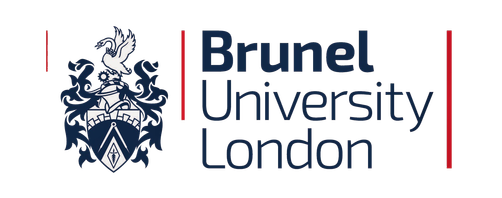

In [1]:
# Importing packages needed for the implementation
import numpy as np
import pandas as pd
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
# Importing the data from the 'sample data' folder
# To do this, simply add the dataset into this folder
# It should be noted that this would need to be carried out each time the notebook is loaded
dataframe=pd.read_csv('sample_data/Delay_Flight_Airport_Visibility.csv')
dataframe.head(n=10)

In [ ]:
# Subsampling the dataset
surveys_df[:50000]

In [ ]:
# Importing a different dataset from the 'sample data' folder
dataframe=pd.read_csv('sample_data/Delayed_Flights.csv')
dataframe.head(n=10)

In [ ]:

dataframe["DepDelay"].plot(figsize=(16,4),legend=True)
plt.title('Delayed Flights')
plt.show()

In [ ]:
# Summarising the first few rows
print(dataframe.head())
# Plotting the data of the attributes used in the prediction
dataframe.plot()
plt.show()

In [ ]:
X=dataframe.drop(columns=['DepDelay'])
Y=dataframe[['DepDelay']]

In [ ]:
# Adding the attributed being used for the prediction
prediction_attributes = ['AirTime', 'CRSElapsedTime', 'DestinationCity','Distance','OriginCity','UniqueCarrier','visibility']
prediction_input = dataframe[prediction_attributes]

# Creating a new column classifying delays as 'short' or 'long'
dataframe['Departure Delay'] = np.where((dataframe['ArrDelay'] <= 45) | (dataframe['ArrDelay'] > 45), 'Short Delay', 'Long Delay')
prediction_output = dataframe['Departure Delay']

# Spliting the dataset into a training set of 80% and a test set of 20%
X_train, X_test, y_train, y_test = train_test_split(prediction_input, prediction_output, test_size=0.2, random_state=1)

In [ ]:
# Adding the attributed being used for the prediction
prediction_attributes = ['AirTime', 'CRSElapsedTime', 'DestinationCity','Distance','OriginCity','UniqueCarrier','visibility']
prediction_input = dataframe[prediction_attributes]

# Creating a new column classifying delays as 'short' or 'long'
dataframe['Departure Delay'] = np.where((dataframe['ArrDelay'] <= 45) | (dataframe['ArrDelay'] > 45), 'Short Delay', 'Long Delay')
prediction_output = dataframe['Departure Delay']

# Spliting the dataset into a training set of 70% and a test set of 30%
X_train, X_test, y_train, y_test = train_test_split(prediction_input, prediction_output, test_size=0.3, random_state=1)

In [ ]:
# Adding the attributed being used for the prediction
prediction_attributes = ['AirTime', 'CRSElapsedTime', 'DestinationCity','Distance','OriginCity','UniqueCarrier','visibility']
prediction_input = dataframe[prediction_attributes]

# Creating a new column classifying delays as 'short' or 'long'
dataframe['Departure Delay'] = np.where((dataframe['ArrDelay'] <= 30) | (dataframe['ArrDelay'] > 30), 'Minor Delay', 'Significant Delay')
prediction_output = dataframe['Departure Delay']

# Spliting the dataset into a training set of 80% and a test set of 20%
X_train, X_test, y_train, y_test = train_test_split(prediction_input, prediction_output, test_size=0.2, random_state=1)

In [6]:
# Building a deep learning model
model=keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
# Adding eight neurons to the first hidden layer - with a 'ReLU activation function'
model.add(keras.layers.Dense(8, activation='relu'))
# Adding eight neurons to the second hidden layer - with a 'ReLU activation function' 
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

#model.fit(X, Y, epochs =20, verbose=1)
model.fit(X, Y, epochs =50, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# Building a deep learning model
model=keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
# Adding eight neurons to the first hidden layer - with a 'ReLU activation function'
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

#model.fit(X, Y, epochs =20, verbose=1)
model.fit(X, Y, epochs =50, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# Building a deep learning model
model=keras.Sequential()
model.add(keras.layers.Dense(8, activation='sigmoid', input_shape=(8,)))
# Adding eight neurons to the first hidden layer - with a 'Sigmoid activation function'
model.add(keras.layers.Dense(8, activation='sigmoid'))
# Adding eight neurons to the second hidden layer - with a 'Sigmoid activation function' 
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(1))

#model.fit(X, Y, epochs =20, verbose=1)
model.fit(X, Y, epochs =50, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# Trying to build an LSTM architecture
regressor = Sequential()
# Adding the first LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Adding the second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Adding the third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Adding the fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)